In [368]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [369]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [370]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [371]:
df.shape

(1460, 81)

In [372]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
train_ids = X_train.pop('Id')
test_ids = X_test.pop('Id')

In [374]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [375]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [376]:
X_train.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.185788
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

In [377]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

In [378]:
X_test.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.143836
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

In [425]:
import pandas as pd

def custom_preprocess(df: pd.DataFrame, missing_threshold: float = 0.8) -> pd.DataFrame:
    
    cols_to_drop = df.columns[df.isnull().mean() >= missing_threshold]
    df = df.drop(columns=cols_to_drop)

    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    df[numeric_cols] = df[numeric_cols].fillna(0)
    df[categorical_cols] = df[categorical_cols].fillna("NO")

    return df


In [426]:
X_train_cleaned = custom_preprocess(X_train.copy())
X_test_cleaned = custom_preprocess(X_test.copy())

In [427]:
X_train_cleaned.isna().mean()

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 75, dtype: float64

In [428]:
X_train_cleaned.isna().mean().sum()

0.0

In [429]:
cat_cols = [col for col in X_train_cleaned.columns if X_train_cleaned[col].dtype == 'object']
num_cols = [col for col in X_train_cleaned.columns if X_train_cleaned[col].dtype != 'object']

In [430]:
s = X_train_cleaned[cat_cols].nunique()

In [431]:
s

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [432]:
threshold = 3

woe_columns = list(s[s > threshold].index)
one_hot_columns = list(s[s <= threshold].index)

In [433]:
X_train[woe_columns].mode().T[0].to_dict()

{'MSZoning': 'RL',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'LotConfig': 'Inside',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'BrkFace',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'Gd',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'SaleType': 'WD',
 'SaleCondition': 'Normal'}

In [434]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

    def fit(self, X, y):
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        print("***")
        print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed

In [389]:
preprocessor = CustomPreprocessor(woe_columns=woe_columns, one_hot_columns=one_hot_columns)

In [390]:
X_train_t = preprocessor.fit_transform(X_train_cleaned, y_train)

Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]


In [391]:
X_test_t = preprocessor.transform(X_test_cleaned)

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMatl_woe', 'Electrical_woe']
RoofMatl_woe RoofMatl woe CompShg 1.978151445288834e-08
Electrical_woe Electrical woe SBrkr -1.6238219677231588e-07


In [392]:
X_train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_woe,LotShape_woe,LandContour_woe,LotConfig_woe,Neighborhood_woe,Condition1_woe,Condition2_woe,BldgType_woe,HouseStyle_woe,RoofStyle_woe,RoofMatl_woe,Exterior1st_woe,Exterior2nd_woe,MasVnrType_woe,ExterQual_woe,ExterCond_woe,Foundation_woe,BsmtQual_woe,BsmtCond_woe,BsmtExposure_woe,BsmtFinType1_woe,BsmtFinType2_woe,Heating_woe,HeatingQC_woe,Electrical_woe,KitchenQual_woe,Functional_woe,FireplaceQu_woe,GarageType_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,SaleType_woe,SaleCondition_woe,Street_Pave,Street_nan,Utilities_NoSeWa,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.0,1,294,250,0,0,0,0,0,0,6,2010,-2.576594e-07,4.984725e-07,2.497580e-08,9.208937e-08,1.272474e-06,-9.535265e-08,-1.462012e-09,-1.389329e-07,1.334230e-07,3.046700e-07,1.978151e-08,1.180022e-06,1.147331e-06,7.868172e-07,0.000001,4.481936e-07,0.000001,1.515354e-06,-8.535108e-08,4.949177e-07,1.231387e-06,-9.680952e-08,-3.674229e-08,1.439573e-06,-1.623822e-07,1.525952e-06,-7.911248e-08,1.495367e-06,-5.752305e-07,-5.657589e-07,-1.841827e-07,-2.004276e-07,2.098090e-07,1.808244e-07,1,0,0,0,0,0,0,1,0,0,1,0
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,799,799,799,772,0,1571,0,0,2,1,3,1,7,1,1993.0,2,380,0,40,0,0,0,0,0,5,2009,-2.576594e-07,-5.822046e-07,2.497580e-08,9.208937e-08,-4.234132e-07,-9.535265e-08,-1.462012e-09,-1.389329e-07,-7.310505e-07,3.046700e-07,1.978151e-08,-8.165154e-07,-8.309587e-07,7.868172e-07,-0.000001,-1.013703e-07,-0.000001,-5.927274e-07,-8.535108e-08,4.949177e-07,2.259876e-07,-9.680952e-08,-3.674229e-08,9.239428e-07,-1.623822e-07,1.525952e-06,-7.911248e-08,-6.567983e-07,-5.752305e-07,-5.657589e-07,-1.841827e-07,-2.004276e-07,2.098090e-07,1.808244e-07,1,0,0,0,0,0,0,1,0,0,1,0
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,4,0,0.0,0,0,328,0,164,0,0,0,0,5,2008,-2.576594e-07,4.984725e-07,2.497580e-08,9.208937e-08,2.306666e-06,1.535415e-06,-1.462012e-09,-1.389329e-07,1.334230e-07,3.046700e-07,1.978151e-08,1.180022e-06,1.136699e-06,7.868172e-07,0.000001,-1.013703e-07,0.000001,2.892086e-06,-8.535108e-08,4.949177e-07,2.259876e-07,-9.680952e-08,-3.674229e-08,9.239428e-07,2.489083e-06,1.525952e-06,-7.911248e-08,1.495367e-06,4.294716e-06,4.294716e-06,4.294716e-06,4.294716e-06,2.098090e-07,1.808244e-07,1,0,0,0,0,0,0,1,0,1,0,0
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1939.0,1,240,0,0,264,0,0,0,0,6,2007,-2.576594e-07,4.984725e-07,2.497580e-08,1.478587e-07,1.393570e-06,1.535415e-06,-1.462012e-09,-1.389329e-07,1.553061e-06,3.046700e-07,1.978151e-08,1.121179e-06,1.136699e-06,-5.561176e-07,0.000001,-1.013703e-07,0.000002,-5.927274e-07,-8.535108e-08,4.949177e-07,7.018106e-07,-9.680952e-08,-3.674229e-08,-8.935354e-07,-1.623822e-07,-7.819984e-07,-7.911248e-08,-6.567983e-07,1.810017e-06,1.437784e-06,-1.841827e-07,-2.004276e-07,2.098090e-07,1.808244e-07,1,0,0,0,0,0,0,1,0,0,1,0
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,808,1026,1026,665,0,1691,0,0,2,0,3,1,6,1,1924.0,1,308,0,0,242,0,0,0,0,5,2010,-2.576594e-07,4.984725e-07,2.497580e-08,9.208937e-08,1.393570e-06,-9.535265e-08,-1.462012e-09,-1.389329e-07,1.553061e-06,3.046700e-07,1.978151e-08,-6.717936e-07,1.136699e-06,7.868172e-07,0.000001,-1.013703e-07,0.000002,1.515354e-06,-8.535108e-08,4.949177e-07,1.147631e-06,-9.680952e-08,-3.674229e-08,1.439573e-06,-1.623822e-07,-7.819984e-07,-7.911248e-08,-1.064184e-06,1.810017e-06,1.437784e-06,-1.841827e-07,-2.004276e-07,2.098090e-07,1.808244e-07,1,0,0,0,0,0,0,1,0,0,1

In [393]:
X_corr = X_train_t.copy()
X_corr['target'] = y_train

In [394]:
%%time

corr_matrix = X_corr.corr().abs()

CPU times: user 25.9 ms, sys: 1.09 ms, total: 27 ms
Wall time: 24.9 ms


In [395]:
corr_matrix

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_woe,LotShape_woe,LandContour_woe,LotConfig_woe,Neighborhood_woe,Condition1_woe,Condition2_woe,BldgType_woe,HouseStyle_woe,RoofStyle_woe,RoofMatl_woe,Exterior1st_woe,Exterior2nd_woe,MasVnrType_woe,ExterQual_woe,ExterCond_woe,Foundation_woe,BsmtQual_woe,BsmtCond_woe,BsmtExposure_woe,BsmtFinType1_woe,BsmtFinType2_woe,Heating_woe,HeatingQC_woe,Electrical_woe,KitchenQual_woe,Functional_woe,FireplaceQu_woe,GarageType_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,SaleType_woe,SaleCondition_woe,Street_Pave,Street_nan,Utilities_NoSeWa,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,target
MSSubClass,1.000000,0.202373,0.116501,0.029719,0.052768,0.001928,0.036081,0.013443,0.080944,0.074205,0.131854,0.244521,0.251166,0.319823,0.061018,0.088452,0.002678,0.010991,0.152088,0.159388,0.003837,0.313353,0.068623,0.045602,0.068261,0.040787,0.096140,0.022712,0.011753,0.008086,0.058672,0.033155,0.003578,0.006216,0.014139,0.028758,0.256490,0.102363,0.030455,0.034968,0.085094,0.005816,0.087198,0.617930,0.105866,0.140467,0.028701,0.001934,0.031948,0.012404,0.008004,0.062158,0.036927,0.046802,0.020958,0.033686,0.085278,0.003845,0.024474,0.010364,0.015128,0.018005,0.037029,0.042940,0.118688,0.061832,0.060414,0.075606,0.030481,0.048496,0.056052,NaN,0.025373,NaN,0.005846,0.000379,NaN,0.117300,NaN,0.025914,0.068554,NaN,0.088081
LotFrontage,0.202373,1.000000,0.087948,0.186277,0.043057,0.040650,0.088542,0.101919,0.101832,0.016209,0.147134,0.249296,0.250945,0.034164,0.038391,0.217169,0.013470,0.019195,0.117869,0.013581,0.138408,0.036669,0.210532,0.038284,0.027536,0.168289,0.200186,0.025213,0.063685,0.029519,0.038468,0.039085,0.129274,0.066795,0.036161,0.011595,0.084018,0.159668,0.009841,0.217222,0.095402,0.067319,0.011860,0.066368,0.039385,0.129605,0.012188,0.067371,0.097939,0.077496,0.113610,0.015173,0.078626,0.116237,0.039903,0.066204,0.055516,0.032066,0.016535,0.107190,0.007984,0.114084,0.014997,0.074232,0.075640,0.088278,0.017206,0.022956,0.172165,0.150799,0.004928,NaN,0.047370,NaN,0.026396,0.101104,NaN,0.011033,NaN,0.004658,0.015699,NaN,0.201372
LotArea,0.116501,0.087948,1.000000,0.102088,0.001625,0.013541,0.017216,0.126098,0.224270,0.122366,0.014815,0.262559,0.298230,0.054405,0.007603,0.266187,0.168373,0.050377,0.117296,0.022936,0.117883,0.027174,0.186956,0.271525,0.070376,0.151803,0.179124,0.177537,0.086320,0.024948,0.023200,0.046353,0.086463,0.038358,0.003973,0.005098,0.145270,0.262105,0.122952,0.166982,0.170918,0.016554,0.034996,0.038341,0.001535,0.100223,0.065034,0.015536,0.016014,0.015858,0.047965,0.029624,0.023089,0.079903,0.037922,0.188292,0.013617,0.008125,0.012742,0.009557,0.052392,0.060096,0.014280,0.184239,0.139738,0.123851,0.076827,0.079584,0.028390,0.031362,0.241667,NaN,0.010031,NaN,0.081352,0.636206,NaN,0.059751,NaN,0.020291,0.007312,NaN,0.266204
OverallQual,0.029719,0.186277,0.102088,1.000000,0.087599,0.558124,0.538251,0.413083,0.204864,0.050637,0.330061,0.529557,0.463751,0.288717,0.023523,0.581783,0.091070,0.061374,0.539661,0.266661,0.081399,0.188451,0.416332,0.384819,0.284251,0.587487,0.550476,0.232991,0.288691,0.121967,0.025278,0.060840,0.079182,0.032040,0.053355,0.017635,0.239422,0.178690,0.106477,0.075783,0.657821,0.171229,0.131622,0.174500,0.285361,0.187124,0.087091,0.395184,0.415672,0.441197,0.702730,0.185368,0.555419,0.671418,0.290839,0.327882,0.499563,0.243870,0.137347,0.478575,0.247251,0.673100,0.155992,0.494254,0.478368,0.544957,0.287547,0.294950,0.317626,0.309309,0.037375,NaN,0.002603,NaN,0.061911,0.043649,NaN,0.270798,NaN,0.069409,0.218929,NaN,0.78555

In [396]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    if abs(X_train_t[feat1].corr(y)) < abs(X_train_t[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

Highly correlated feature pairs:
TotalBsmtSF and 1stFlrSF: 0.8274
GrLivArea and TotRmsAbvGrd: 0.8207
Fireplaces and FireplaceQu_woe: 0.8409
GarageYrBlt and GarageQual_woe: 0.9050
GarageYrBlt and GarageCond_woe: 0.8876
GarageCars and GarageArea: 0.8825
Exterior1st_woe and Exterior2nd_woe: 0.8691
GarageQual_woe and GarageCond_woe: 0.9052
SaleType_woe and SaleCondition_woe: 0.8032
Features to drop due to high correlation: ['GarageYrBlt', 'SaleCondition_woe', 'Fireplaces', 'Exterior1st_woe', 'GarageQual_woe', '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd']


In [397]:
X_train_t = X_train_t.drop(columns=features_to_drop)
X_test_t = X_test_t.drop(columns=features_to_drop)

In [398]:
X_train_t.shape

(1168, 74)

In [399]:
X_test_t.shape

(292, 73)

Features selected by RFE:
1. MSSubClass
2. OverallQual
3. OverallCond
4. MasVnrArea
5. BsmtFinSF1
6. GrLivArea
7. BsmtFullBath
8. GarageCars
9. LandContour_woe
10. Neighborhood_woe
11. BsmtQual_woe
12. BsmtExposure_woe
13. BsmtFinType2_woe
14. KitchenQual_woe
15. SaleType_woe


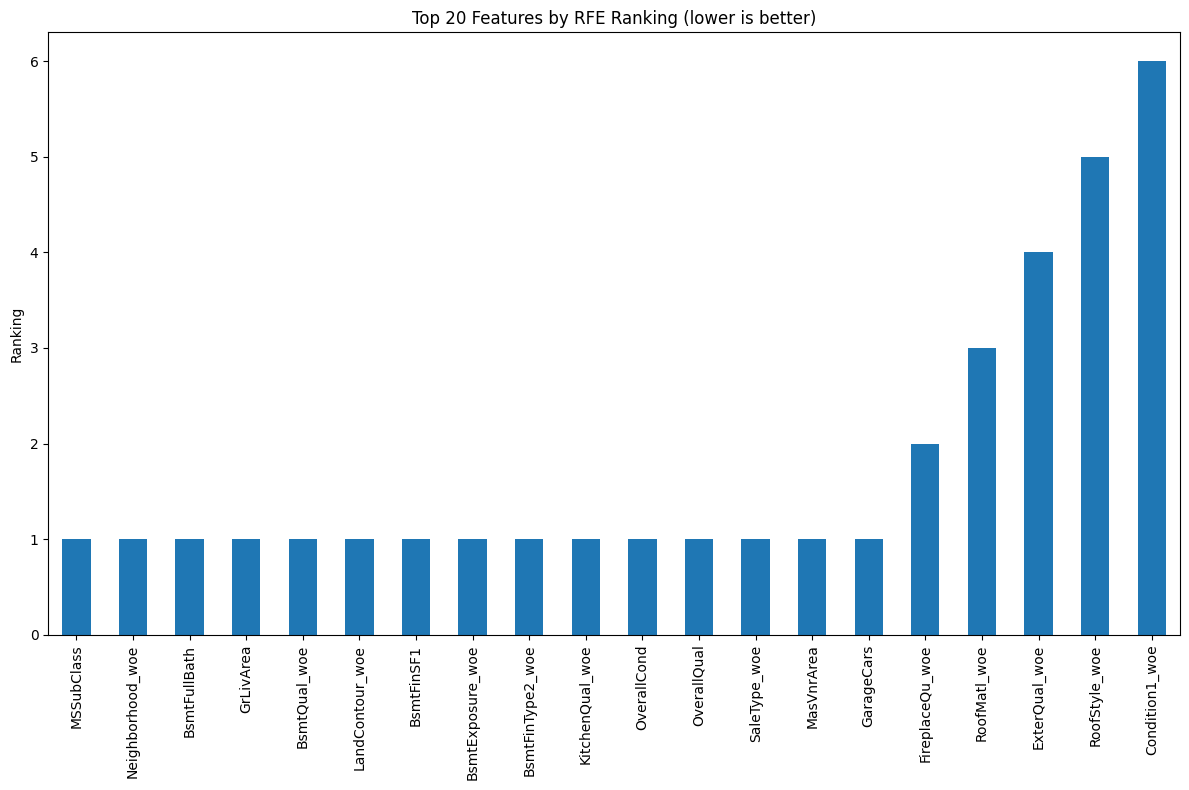

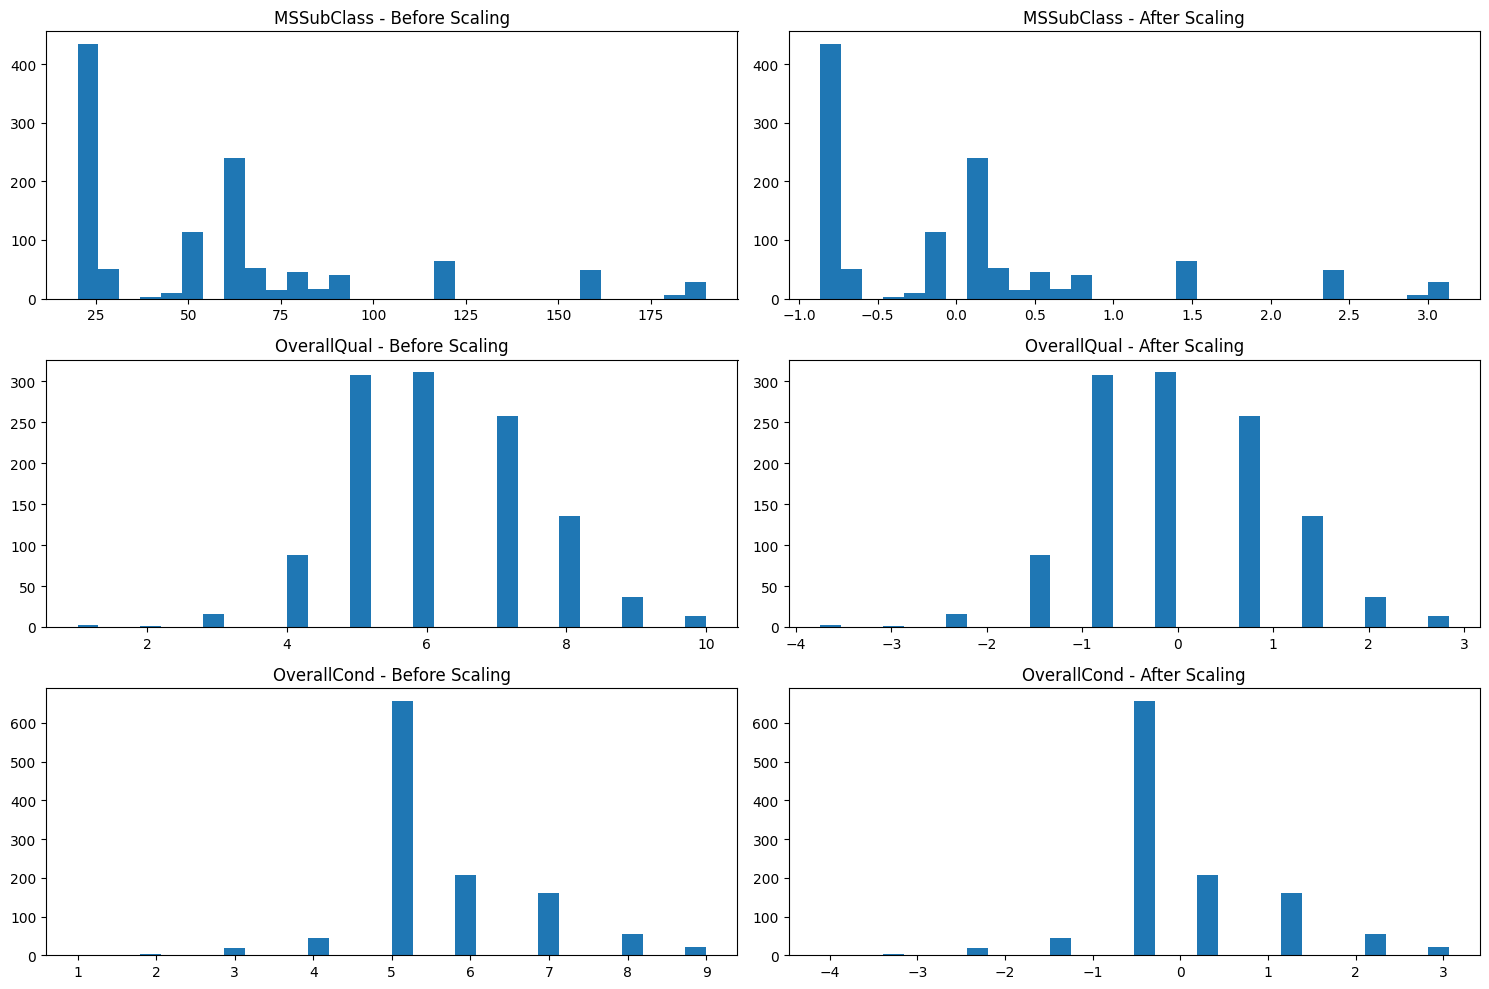

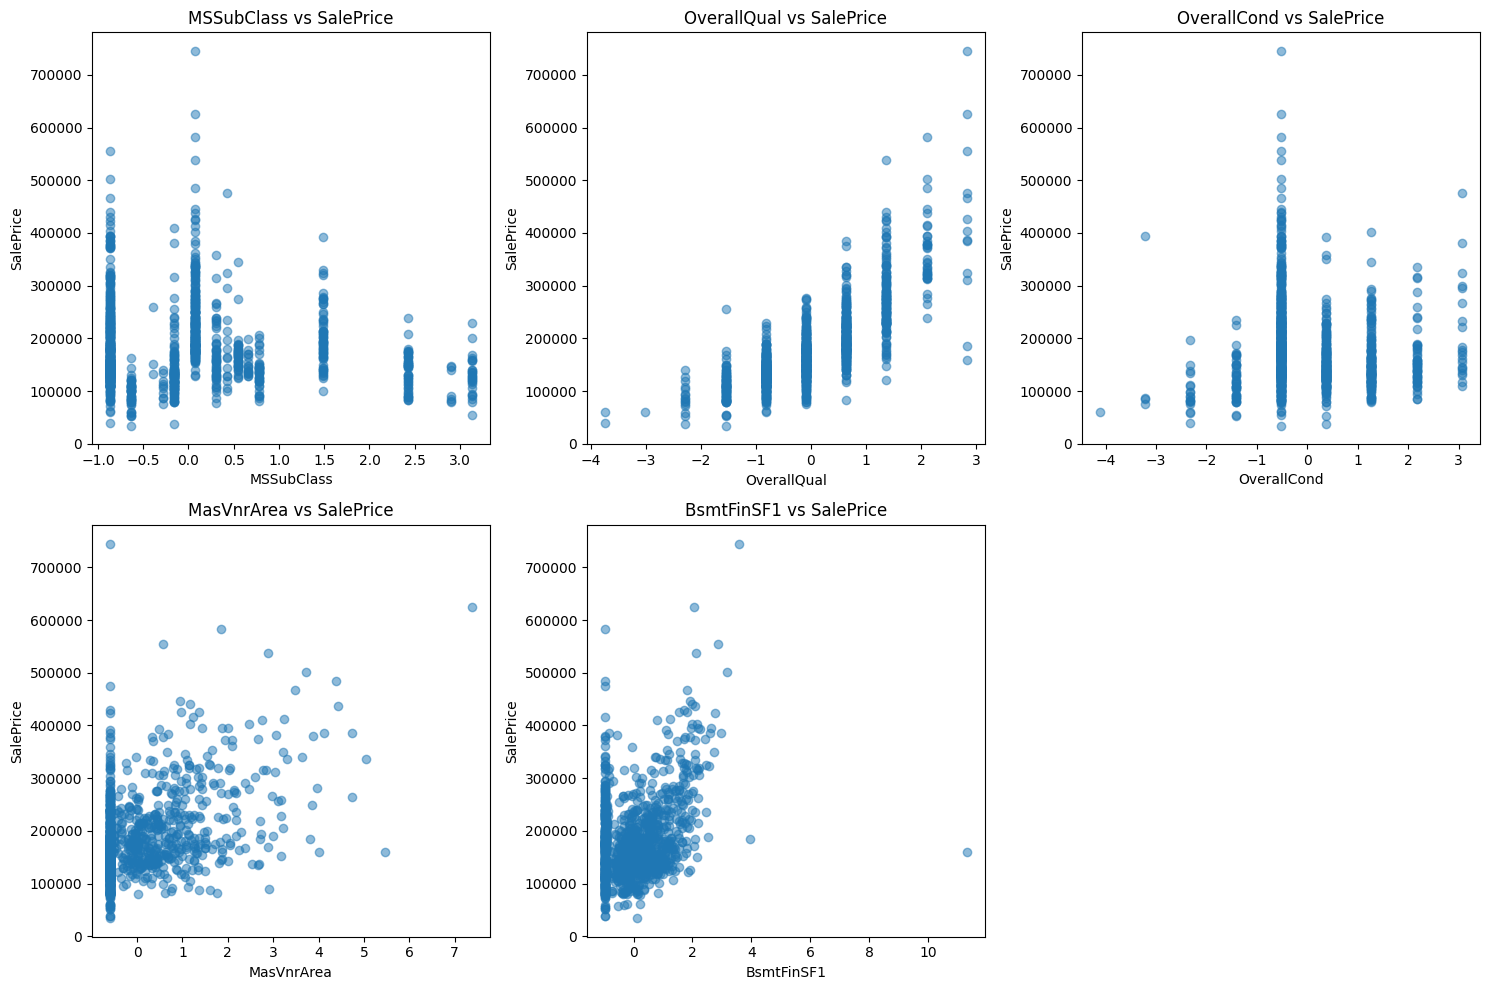

In [400]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_t),
    columns=X_train_t.columns,
    index=X_train_t.index
)

# Create and fit the model for feature selection only
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

# Get selected features
rfe_selected_features = X_train_t.columns[rfe.support_].tolist()
print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

# Create plot for feature ranking
feature_ranking = pd.Series(rfe.ranking_, index=X_train_t.columns)
plt.figure(figsize=(12, 8))
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()
plt.savefig("rfe_feature_ranking.png")

# Create before/after scaling visualization for a few selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:3], 1):
    plt.subplot(3, 2, 2*i-1)
    plt.hist(X_train_t[feature], bins=30)
    plt.title(f'{feature} - Before Scaling')

    plt.subplot(3, 2, 2*i)
    plt.hist(X_train_scaled[feature], bins=30)
    plt.title(f'{feature} - After Scaling')

plt.tight_layout()
plt.savefig("scaling_visualization.png")

# Create scatter plots of features vs. target for top 5 features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:5], 1):  # Plot top 5 features
    plt.subplot(2, 3, i)
    plt.scatter(X_train_scaled[feature], y_train, alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.savefig("feature_distributions.png")

# Show plots if in interactive mode
plt.show()


In [401]:
from sklearn.base import BaseEstimator, TransformerMixin

class FinalCustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns, final_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

        self.final_columns = final_columns # Columns Selected By RFE

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            # print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        # Preprocess WOE Columns
        # print("***")
        # print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        # print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        # print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        # print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                # print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            # print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed[self.final_columns]

In [402]:
final_preprocessor = FinalCustomPreprocessor(woe_columns=woe_columns, 
                                             one_hot_columns=one_hot_columns, 
                                             final_columns=rfe_selected_features)

In [403]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [404]:
X_train_clean = custom_preprocess(X_train)
X_test_clean = custom_preprocess(X_test)
test_clean = custom_preprocess(test)

In [405]:
test_clean.shape

(1459, 76)

In [421]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

pipeline_lr = Pipeline([
    ('preprocessing', FinalCustomPreprocessor(
        woe_columns=woe_columns,
        one_hot_columns=one_hot_columns,
        final_columns=rfe_selected_features
    )),
    ('scaling', StandardScaler()),
    ('regressor', Lasso())
])

pipeline_lr.fit(X_train_clean, y_train)

y_pred = pipeline_lr.predict(X_test_clean)

log_y_pred = np.log(y_pred)
log_y_true = np.log(y_test)

rmse = mean_squared_error(log_y_true, log_y_pred, squared=False)
print(f"Root Mean Squared Error (log-scale): {rmse:.4f}")
with mlflow.start_run(run_name="LinearRegression_RMSE"):
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("test_log_rmse", rmse)
    mlflow.sklearn.log_model(pipeline_lr, artifact_path="linear_regression_model")
    print("MLflow run logged successfully.")

Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMat

2025/04/10 14:26:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run logged successfully.
🏃 View run LinearRegression_RMSE at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0/runs/6ca0232cfe2c4fdbafc24aea1243de23
🧪 View experiment at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0


In [423]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import mlflow
import mlflow.sklearn

def log_rmse(y_true, y_pred):
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred), squared=False)

log_rmse_scorer = make_scorer(log_rmse, greater_is_better=False)

pipeline_rf = Pipeline([
    ('preprocessing', FinalCustomPreprocessor(
        woe_columns=woe_columns,
        one_hot_columns=one_hot_columns,
        final_columns=rfe_selected_features
    )),
    ('scaling', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline_rf,
    param_grid=param_grid,
    cv=cv,
    scoring=log_rmse_scorer,
    verbose=2,
    return_train_score=True
)

grid_search.fit(X_train_clean, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_clean)

log_y_pred = np.log(y_pred)
log_y_true = np.log(y_test)

rmse = mean_squared_error(log_y_true, log_y_pred, squared=False)

with mlflow.start_run(run_name="RandomForest_GridSearch_LogRMSE"):
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_metric("cv_log_rmse", -grid_search.best_score_)
    mlflow.log_metric("test_log_rmse", rmse)
    mlflow.sklearn.log_model(best_model, artifact_path="random_forest_model")
    print("MLflow run logged successfully.")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing W

2025/04/10 14:31:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run logged successfully.
🏃 View run RandomForest_GridSearch_LogRMSE at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0/runs/022531934d194fd0b5ca452989b809bd
🧪 View experiment at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0


In [418]:
!pip install dagshub mlflow

In [419]:
import dagshub
dagshub.init(repo_owner='electrolizzys', repo_name='ML_assn_01', mlflow=True)


Initialized MLflow to track repo "electrolizzys/ML_assn_01"

Repository electrolizzys/ML_assn_01 initialized!

In [420]:
import mlflow
with mlflow.start_run():
  mlflow.log_param('lizzi tst1', 'value')
  mlflow.log_metric('metric name', 1)

🏃 View run peaceful-bird-192 at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0/runs/f7c78dd4d0c54783af81ecdcefd3c00b
🧪 View experiment at: https://dagshub.com/electrolizzys/ML_assn_01.mlflow/#/experiments/0


In [437]:
preds = pipeline_lr.predict(test_clean)
sample_submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df["SalePrice"] = preds
sample_submission_df.to_csv("submission03.csv", index=False)
print("Final submission file 'submission03.csv' is ready!")

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['MSZoning_woe', 'Exterior1st_woe', 'Exterior2nd_woe', 'KitchenQual_woe', 'Functional_woe', 'SaleType_woe']
MSZoning_woe MSZoning woe RL -2.576594184662983e-07
Exterior1st_woe Exterior1st woe VinylSd -8.165153784808399e-07
Exterior2nd_woe Exterior2nd woe VinylSd -8.309587017030542e-07
KitchenQual_woe KitchenQual woe TA 1.5259522977679691e-06
Functional_woe Functional woe Typ -7.91124809204135e-08
SaleType_woe SaleType woe WD 2.0980901147020062e-07
Final submission file 'submission03.csv' is ready!
